# Pulsar Data Manipulation

### EDA

In [1]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/pulsar_data_train.csv")
features_names = list(df.columns[:-1])
df.head() # first 5 lines

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### Imputation of Missing Values

In [4]:
df.isnull().sum() # check missing values

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
# split training and testing set

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

pulsar_target = df.target_class
pulsar_predictors = df.drop(['target_class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(pulsar_predictors, pulsar_target,
                                                   train_size=0.8, test_size=0.2, random_state=0)

In [6]:
# impute missing values for train and test
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imp = imp.fit_transform(X_train) # fit and transform training set
X_test_imp = imp.transform(X_test) # use fit with training set to transfrom testing set

In [7]:
# confirmation there is no nan in the numpy array

np.isnan(np.sum(X_train_imp)), np.isnan(np.sum(X_test_imp))

(False, False)

### Outlier Analysis

In [8]:
predictors_imp = pd.DataFrame(np.vstack((X_train_imp, X_test_imp))) # join the training and testing sets back together

In [9]:
Q1 = predictors_imp.quantile(0.25)
Q3 = predictors_imp.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1 - (1.5 * IQR) # use the 1.5 IQR rule
upper_range= Q3 + (1.5 * IQR)

In [10]:
print('Percentage of Outliers:')
((predictors_imp < lower_range) | (predictors_imp > upper_range)).sum() / len(predictors_imp) * 100

Percentage of Outliers:


0     5.723180
1     1.420817
2     7.910281
3    10.696041
4    16.339400
5    13.513729
6     2.785760
7     5.555556
dtype: float64

In [11]:
predictors_imp_out = predictors_imp.copy() # copy the imputed predictor values and cap the outliers
for cols in predictors_imp_out.columns[:]:
    predictors_imp_out[cols] = np.where(predictors_imp_out[cols]>upper_range[cols],
                                      upper_range[cols],predictors_imp_out[cols])
    predictors_imp_out[cols] = np.where(predictors_imp_out[cols]<lower_range[cols],
                                      lower_range[cols],predictors_imp_out[cols])

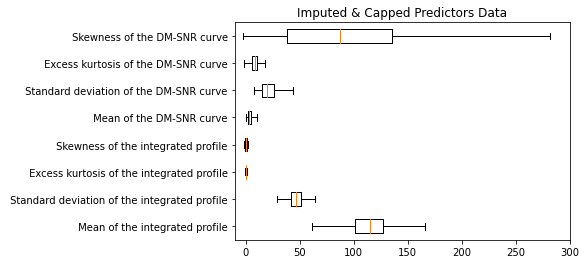

In [36]:
plt.title("Imputed & Capped Predictors Data")
plt.boxplot(predictors_imp_out, vert = 0)
plt.xlim(-10, 300)
plt.yticks(list(range(1, 9)),features_names);